In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns
from adjustText import adjust_text
sns.set_context("notebook", rc={"lines.linewidth": 3})
##################################################
plt.style.use('tableau-colorblind10')
##################################################

In [4]:
cate = "primaryNivo"
ano = "os"
df = pd.read_csv(f"./cox_result/cox_result_{cate}_{ano}.txt")
df

covariate      coef  exp(coef)  se(coef)  coef lower 95%  \
0      PAIP1_PPP6R2 -1.082763   0.338658  1.595641       -4.210162   
1        MTIF3_PKD1  1.261628   3.531165  1.623684       -1.920734   
2        ADNP_TPCN2 -2.571714   0.076404  1.637240       -5.780645   
3       MIB2_NT5C3A -4.178829   0.015316  1.669401       -7.450794   
4      NADSYN1_RPL7 -0.828411   0.436743  1.640151       -4.043047   
...             ...       ...        ...       ...             ...   
9995   EIF3E_IL11RA -4.399097   0.012288  2.044799       -8.406830   
9996  CCDC142_CSDE1  1.401037   4.059406  1.987473       -2.494338   
9997    CCNL2_NEDD1 -2.356126   0.094787  1.993126       -6.262582   
9998    RPL37_STK11  0.799282   2.223944  1.991869       -3.104709   
9999  ACTR2_ATG16L2 -4.012030   0.018097  1.993160       -7.918551   

      coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  cmp to  \
0           2.044635             0.014844             7.726340     0.0   
1           4.443990             0.146499            85.113874     0.0   
2           0.637218             0.003087             1.891212     0.0   
3          -0.906863             0.000581             0.403789     0.0   
4           2.386225             0.017544            10.872374     0.0   
...              ...                  ...                  ...     ...   
9995       -0.391364             0.000223             0.676134     0.0   
9996        5.296411             0.082551           199.619171     0.0   
9997        1.550330             0.001906             4.713024     0.0   
9998        4.703274             0.044838           110.307674     0.0   
9999       -0.105509             0.000364             0.899866     0.0   

             z         p  -log2(p)  
0    -0.678576  0.497407  1.007502  
1     0.777016  0.437149  1.193801  
2    -1.570761  0.116238  3.104845  
3    -2.503191  0.012308  6.344269  
4    -0.505082  0.613501  0.704862  
...        ...       ...       ...  
9995 -2.151359  0.031448  4.990894  
9996  0.704934  0.480851  1.056337  
9997 -1.182126  0.237156  2.076093  
9998  0.401272  0.688220  0.539059  
9999 -2.012900  0.044125  4.502254  

[10000 rows x 12 columns]

-3.5666435254257705 15.994208573323506
-3.6463836602801467 13.620831344075754
-3.3359979998407234 13.230633698746022
-3.067902739351943 12.177038080139882
-3.016889467490556 11.905548833515361
-3.1893894054162937 11.716226016477837
-3.086042239494362 11.529641813019852
-3.004472060316887 11.252785710098237
-3.263510800086979 11.101403222902801
-2.9480632669770306 10.999582935974152


/tmp/ipykernel_1293646/3510078192.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(ax.text(np.log10(r['exp(coef)']), -np.log2(r['p']), r[0]))


<Figure size 576x432 with 0 Axes>

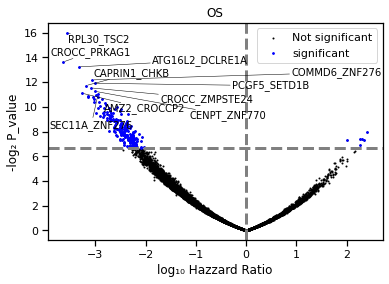

In [5]:
from gseapy import barplot, dotplot
import scienceplots

plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
plt.rc('font', family='DejaVu Sans')


ax.scatter(x=df['exp(coef)'].apply(lambda x:np.log10(x)),y=df['p'].apply(lambda x:-np.log2(x)),s=1,label="Not significant",color="k")

# highlight down- or up- regulated genes
down = df[(df['p']<=0.01)]

ax.scatter(x=down['exp(coef)'].apply(lambda x:np.log10(x)),y=down['p'].apply(lambda x:-np.log2(x)),s=3,label="significant",color="blue")
#plt.scatter(x=up['logFC'],y=up['adj.P.Val'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")

texts = []
for i,r in df.sort_values(by=["p"]).iloc[:10].iterrows():
    #plt.text(x=np.log10(r['exp(coef)']),y=-np.log2(r['p']),s=r[0], va="center",ha='center', fontsize=8)
    print(np.log10(r['exp(coef)']),-np.log2(r['p']))
    if np.log10(r['exp(coef)']) == -np.inf:
        print("yes")
    else:
        texts.append(ax.text(np.log10(r['exp(coef)']), -np.log2(r['p']), r[0]))



plt.xlabel("log\N{SUBSCRIPT ONE}\N{SUBSCRIPT ZERO} Hazzard Ratio")
plt.ylabel("-log\N{SUBSCRIPT TWO} P_value")
#plt.axvline(-2,color="grey",linestyle="--")
#plt.axvline(2,color="grey",linestyle="--")
plt.axvline(np.log10(1),color="grey",linestyle="--")
plt.axhline(6.644,color="grey",linestyle="--")
#plt.xlim([-10, 10])
plt.legend()

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

plt.title(f"{ano.upper()}")
plt.savefig(f"f4.{cate}{ano}_edge_volcanoplot.tif",dpi=600,bbox_inches='tight')
plt.savefig(f"f4.{cate}{ano}_edge_volcanoplot.svg",dpi=600,bbox_inches='tight')
plt.show()
plt.close()